training_error:  1.1281679666875482
learning_rate 1e-05  test_error:  1.3291601358251257
training_error:  0.9572745915146749
learning_rate 5e-05  test_error:  0.5477225575051661
training_error:  0.8624826158582396
learning_rate 0.0001  test_error:  0.408248290463863
training_error:  0.6960592209743002
learning_rate 0.0005  test_error:  0.18257418583505536
training_error:  0.6012326658118147
learning_rate 0.001  test_error:  0.18257418583505536
training_error:  0.5386714834723734
learning_rate 0.005  test_error:  0.31622776601683794
training_error:  0.601416888883769
learning_rate 0.01  test_error:  0.408248290463863


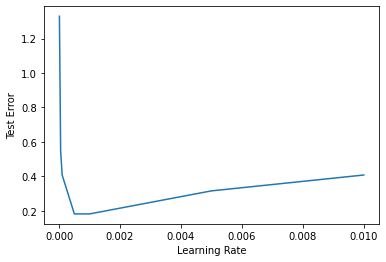

best_rate:  0.0005
training_error:  0.8774247508413333
learning_rate 0.0005  test_error:  0.48304589153964794
training_error:  0.8016369768261948
learning_rate 0.0005  test_error:  0.31622776601683794
training_error:  0.7603865702104067
learning_rate 0.0005  test_error:  0.18257418583505536
training_error:  0.726100183792718
learning_rate 0.0005  test_error:  0.18257418583505536
training_error:  0.6960592209743002
learning_rate 0.0005  test_error:  0.18257418583505536
training_error:  0.669690743355859
learning_rate 0.0005  test_error:  0.18257418583505536
training_error:  0.6466137092179056
learning_rate 0.0005  test_error:  0.18257418583505536
training_error:  0.6264813802879945
learning_rate 0.0005  test_error:  0.18257418583505536
training_error:  0.6089706945601282
learning_rate 0.0005  test_error:  0.18257418583505536
training_error:  0.5937824055707275
learning_rate 0.0005  test_error:  0.18257418583505536
training_error:  0.5205334639166234
learning_rate 0.0005  test_error:  0.

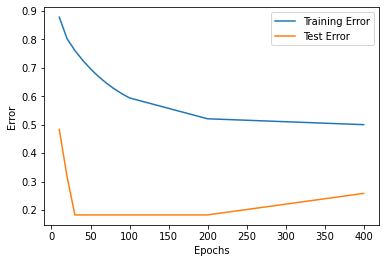

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt

#loading dataset from sklearn
iris = datasets.load_iris()
x = iris.data
y = iris.target
n_features = x.shape[1]

#spliting data into train and test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
n_train = y_train.shape[0]
n_test = y_test.shape[0]

#intializing hyper-parameter
learning_rates = [1e-5,5e-5,1e-4,5e-4,1e-3,5e-3,1e-2]
best_rate = 0
min_error = 1e5
epochs = 50
y_axis = []

for n in learning_rates:
  #implementing first perceptron for classification of class- one( traget = 0)
  #initializing the weights 
  w1 = np.zeros(n_features)
  w2 = np.zeros(n_features)
  training_error = 0

  #training the perceptron1
  for e in range(epochs):
    training_error = 0
    for i in range(n_train):
      #predict output
      y = 0
      for feature in range(n_features):
        y = y + w1[feature]*x_train[i,feature]

      #calculating target
      t = 1
      if y_train[i] >0:
        t = -1

      #calculating error
      error = t- y
      training_error = training_error+ error*error
      #updating the weights
      for feature in range(n_features):
        w1[feature] = w1[feature] + n*x_train[i,feature]*error

    #implementing second perceptron for the classication of class two and three( target = 1,2)
    for i in range(n_train):
      if y_train[i] > 0:
        #predict output
        y = 0
        for feature in range(n_features):
          y = y + w2[feature]*x_train[i,feature]

        #calculating target
        t = 1
        if y_train[i] >1:
          t = -1

        #calculating error
        error = t- y
        training_error = training_error + error*error
        #updating the weights
        for feature in range(n_features):
          w2[feature] = w2[feature] + n*x_train[i,feature]*error
    
  training_error = math.sqrt(training_error/n_train)
  print("training_error: ",training_error)
  #testing the model on test data
  esq = 0
  for i in range(n_test):
    y = 0
    for feature in range(n_features):
      y = y + w1[feature]*x_test[i,feature]
    if y<0:
      y= 0
      for feature in range(n_features):
        y = y + w2[feature]*x_test[i,feature]
      if y>=0:
        y = 1
      else:
        y = 2
    else:
      y = 0
    error = y - y_test[i]
    esq = esq+ error*error
    #print("y: ",y," t: ",y_test[i]," error: ",error," esq: ",esq)

  test_error = math.sqrt(esq/n_test)
  y_axis.append(test_error)
  if test_error<min_error:
    min_error = test_error
    best_rate = n
  print("learning_rate",n," test_error: ",test_error)

plt.plot(learning_rates, y_axis)
plt.xlabel('Learning Rate')
plt.ylabel('Test Error')
plt.show()

print("best_rate: ",best_rate)

#repeating the process with fixed best learning rate and varying epochs


#intializing hyper-parameter
n = best_rate
epoch_set = [10,20,30,40,50,60,70,80,90,100,200,400]
test_error_set = []
training_error_set = []

for epochs in epoch_set:
  #implementing first perceptron for classification of class- one( traget = 0)
  #initializing the weights 
  w1 = np.zeros(n_features)
  w2 = np.zeros(n_features)
  training_error = 0

  #training the perceptron1
  for e in range(epochs):
    training_error = 0
    for i in range(n_train):
      #predict output
      y = 0
      for feature in range(n_features):
        y = y + w1[feature]*x_train[i,feature]

      #calculating target
      t = 1
      if y_train[i] >0:
        t = -1

      #calculating error
      error = t- y
      training_error = training_error+ error*error
      #updating the weights
      for feature in range(n_features):
        w1[feature] = w1[feature] + n*x_train[i,feature]*error

    #implementing second perceptron for the classication of class two and three( target = 1,2)
    for i in range(n_train):
      if y_train[i] > 0:
        #predict output
        y = 0
        for feature in range(n_features):
          y = y + w2[feature]*x_train[i,feature]

        #calculating target
        t = 1
        if y_train[i] >1:
          t = -1

        #calculating error
        error = t- y
        training_error = training_error + error*error
        #updating the weights
        for feature in range(n_features):
          w2[feature] = w2[feature] + n*x_train[i,feature]*error
    
  training_error = math.sqrt(training_error/n_train)
  training_error_set.append(training_error)
  print("training_error: ",training_error)

  #testing the model on test data
  esq = 0
  for i in range(n_test):
    y = 0
    for feature in range(n_features):
      y = y + w1[feature]*x_test[i,feature]
    if y<0:
      y= 0
      for feature in range(n_features):
        y = y + w2[feature]*x_test[i,feature]
      if y>=0:
        y = 1
      else:
        y = 2
    else:
      y = 0
    error = y - y_test[i]
    esq = esq+ error*error
    #print("y: ",y," t: ",y_test[i]," error: ",error," esq: ",esq)

  test_error = math.sqrt(esq/n_test)
  test_error_set.append(test_error)

  print("learning_rate",n," test_error: ",test_error)

plt.plot(epoch_set, training_error_set,label='Training Error')
plt.plot(epoch_set, test_error_set,label='Test Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
legend = []
legend.append("Training Error")
legend.append("Test Error")
plt.legend(legend, loc='upper right')
plt.show()
    
    
    



